In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Adam Optimization Algorithm
# The Adam algorithm is a gradient-based optimization method that combines the advantages of:
# - Momentum: keeping track of the exponentially decaying average of past gradients to smooth out the updates.
# - RMSProp: keeping track of the exponentially decaying average of squared gradients.
#
# 1. Initialize weights (parameters), first moment (M), second moment (V)
# 2. For each iteration, compute the gradient of loss function with respect to the current weights.
# 3. Update the first and second moment EWMA with beta1 and betw2
# 4. correct the first and second moment estimates using biases.
# 5. Update the weights using the learning rate and the moments.


class AdamOptimizer:
    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.alpha = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None

    def cost_function(self, w):
        return np.sum(w**2)

    def gradient(self, w):
        return 2 * w

    def optimize(self, w_init, max_iterations=1000, epsilon=1e-8, tol=1e-6):
        w = w_init
        self.m = np.zeros_like(w)  # First moment
        self.v = np.zeros_like(w)  # Second moment
        w_history = []
        cost_history = []

        for k in range(1, max_iterations + 1):
            grad_w = self.gradient(w)

            # Update first moment estimate (EWMA of gradients)
            self.m = self.beta1 * self.m + (1 - self.beta1) * grad_w

            # Update second moment estimate (EWMA of squared gradients)
            self.v = self.beta2 * self.v + (1 - self.beta2) * (grad_w ** 2)

            # Bias correction for the first and second moments
            m_hat = self.m / (1 - self.beta1 ** k)
            v_hat = self.v / (1 - self.beta2 ** k)

            # Update weights using Adam rule
            w = w - self.alpha * m_hat / (np.sqrt(v_hat) + self.epsilon)
            w_history.append(w.copy())
            cost_history.append(self.cost_function(w))

        return w, np.array(w_history), np.array(cost_history)

Optimized weights: [ 0.1353301 -0.0008916]


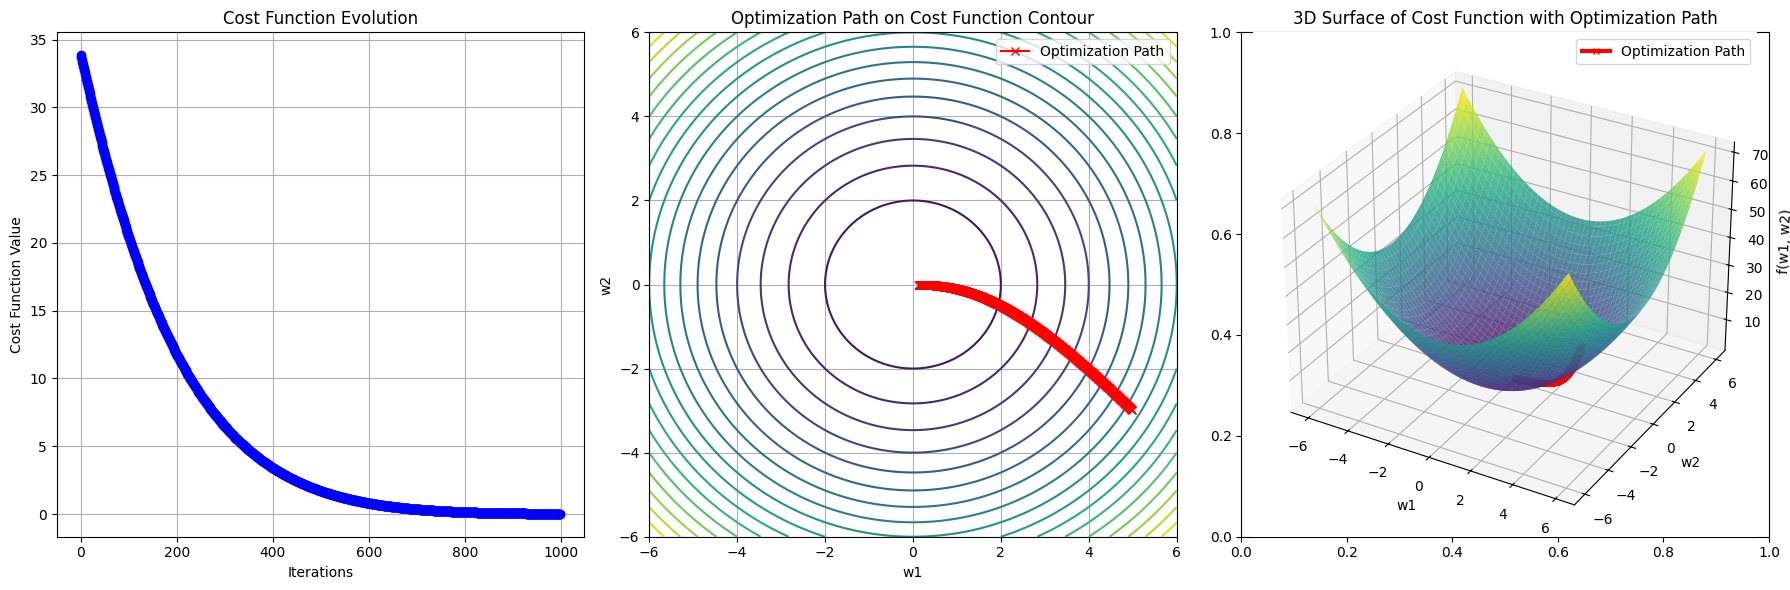

In [10]:

if __name__ == "__main__":


    # Initialize the optimizer
    adam_optimizer = AdamOptimizer(learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)

    # Initial weights
    w_init = np.array([5.0, -3.0])  # Random initial weights

    # Optimize the weights using Adam
    w_optimal, w_history, cost_history = adam_optimizer.optimize(w_init)

    print("Optimized weights:", w_optimal)

    # Plotting
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Plot the cost history (Loss function evolution)
    ax[0].plot(cost_history, color='blue', marker='o')
    ax[0].set_title("Cost Function Evolution")
    ax[0].set_xlabel("Iterations")
    ax[0].set_ylabel("Cost Function Value")
    ax[0].grid(True)

    # Plot the optimization path on a contour plot
    x_vals = np.linspace(-6, 6, 100)
    y_vals = np.linspace(-6, 6, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.sum([X**2, Y**2], axis=0)  # A simple quadratic loss surface

    ax[1].contour(X, Y, Z, levels=20, cmap='viridis')
    ax[1].plot(w_history[:, 0], w_history[:, 1], 'r-x', label="Optimization Path")
    ax[1].set_title("Optimization Path on Cost Function Contour")
    ax[1].set_xlabel("w1")
    ax[1].set_ylabel("w2")
    ax[1].legend()
    ax[1].grid(True)

    # 3D Plot of the loss surface and optimization path
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.view_init(elev=30, azim=-60)
    ax3.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax3.plot(w_history[:, 0], w_history[:, 1], cost_history, color='r', marker='x', markersize=5, linestyle='-', linewidth=3, label="Optimization Path")
    ax3.set_title('3D Surface of Cost Function with Optimization Path')
    ax3.set_xlabel('w1')
    ax3.set_ylabel('w2')
    ax3.set_zlabel('f(w1, w2)')
    ax3.legend()

    plt.tight_layout()
    plt.show()
